<a href="https://colab.research.google.com/github/UmitOzteker/TensorFlow-Projects/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow İle Neural Network Classification

Veri analizinde kullanılan yöntemleri uygulayarak verileri sınıflandırma, bir dizi girdi verisi için sınıflandırma modelleri oluşturmak için kullanılan bir prosedürdür

Classification Tipleri:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

# Data Oluşturma

In [148]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
     noise=0.03,
     random_state=42)

Make Circles 2d boyutunda büyük bir dairenin içine küçük bir daire oluşturur

* **noise parametresi**: Bu parametre veri noktalarına eklenen rastgele hatanın şiddetini belirler. 0.03'lük bir değer, gürültünün neden olduğu maksimum yer değiştirmenin dairelerin yarıçaplarının %3'ü olacağı anlamına gelir. Basitçe ifade edersek, mükemmel dairelerin etrafında hafif bir bulanıklık oluşturur.

In [149]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [150]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [151]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


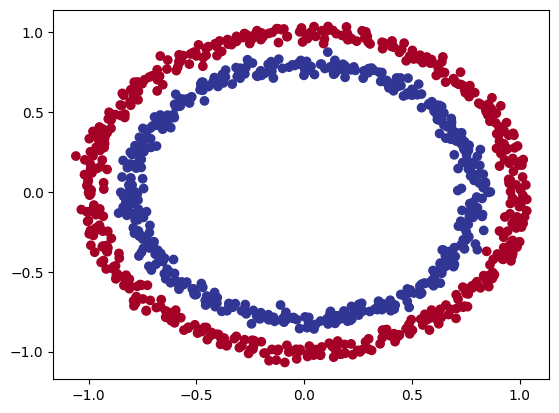

In [152]:
# plot ile Görselleştirme
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

# Input ve Output Şekilleri

In [153]:
 # Label ve feature'ların şekillerinin kontrolü
X.shape, y.shape

((1000, 2), (1000,))

In [154]:
len(X), len(y)

(1000, 1000)

In [155]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Modelleme Adımları

In [156]:
import tensorflow as tf
tf.random.set_seed(42)

# Model Oluşturma
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Modeli Compile Etme
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Modeli Fit Etme
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 4.9725 - accuracy: 0.5033
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 4.3887 - accuracy: 0.5033
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 4.1585 - accuracy: 0.5056
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 1.7152 - accuracy: 0.5008
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7296 - accuracy: 0.4981


In [157]:
# Daha uzun eğiterek modeli geliştirme

model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)
model.evaluate(X, y)

Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7039 - accuracy: 0.5033
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.4998
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.4991
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4979
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4958
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5077
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4964
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4787
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4888
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4980
Epoch 11/

[0.6934650540351868, 0.5]

In [158]:
tf.random.set_seed(42)

# Model Oluşturma
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Modeli Compile Etme
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Modeli Fit Etme
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [159]:
# Modeli Evaluate etme
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5000


[0.6945372223854065, 0.5]

In [160]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

#Modeli Geliştirme

In [161]:
tf.random.set_seed(42)

# Model Oluşturma
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Modeli Compile Etme
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Modeli Fit Etme
model_3.fit(tf.expand_dims(X, axis=-1),y , epochs=100, verbose=0)



In [162]:
# Modeli Evaluate etme
model_3.evaluate(X,y)

32/32 [==============================] - 0s 963us/step - loss: 0.6943 - accuracy: 0.5039


[0.6942669749259949, 0.5038750171661377]

In [163]:
model_3.predict(X)

32/32 [==============================] - 1s 967us/step


array([[[0.50344044],
        [0.5150326 ]],

       [[0.5369334 ],
        [0.51676726]],

       [[0.5382469 ],
        [0.51632315]],

       ...,

       [[0.52320147],
        [0.53812766]],

       [[0.50530064],
        [0.53718495]],

       [[0.51393324],
        [0.49879313]]], dtype=float32)

Tahminleri görselleştirmek için fonksiyon oluşturma

In [164]:
import numpy as np

def plot_decision_boundary(model, X, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 944us/step
doing binary classifcation...


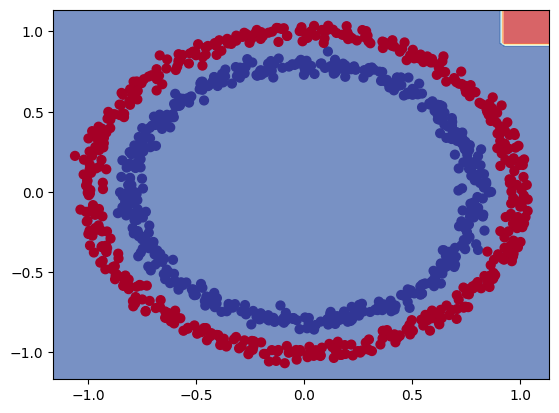

In [165]:
# Tahminleri Kontrol Etm
plot_decision_boundary(model_3, X, y)

In [166]:
tf.random.set_seed(42)

# Regression veri Oluşturma
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_regression, y_regression

# Veriyi eğitim ve test verisine bölme
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Modeli regression data ile fit etme
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: -3835.5632 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: -7149.2114 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0151 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

Model 3 binary classification problem için hazırlandığı için yukarıda çalışmadı


In [167]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 544.1247 - mae: 544.1247
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 423.5837 - mae: 423.5837
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 307.6366 - mae: 307.6366
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 187.0657 - mae: 187.0657
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 68.8824 - mae: 68.8824
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 79.7493 - mae: 79.7493
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 88.7464 - mae: 88.7464
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 57.0194 - mae: 57.0194
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 48.2522 - mae: 48.2522
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 51.5267 - mae: 51.5267
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 3ms/step


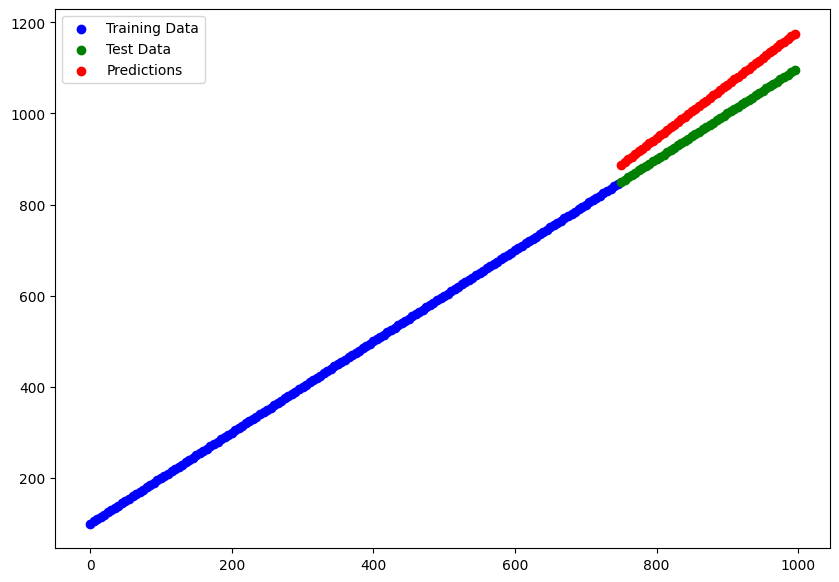

In [168]:
y_reg_preds = model_4.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

In [169]:
tf.random.set_seed(42)

model_5= tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8116 - accuracy: 0.4955
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 5.7349 - accuracy: 0.4985
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 5.6952 - accuracy: 0.4981
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 5.6257 - accuracy: 0.4998
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.5305 - accuracy: 0.4997
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 5.4110 - accuracy: 0.4976
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.3009 - accuracy: 0.4992
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 5.2371 - accuracy: 0.4978
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 5.1659 - accuracy: 0.4996
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 5.1110 - accuracy: 0.5012
Epoch 11/

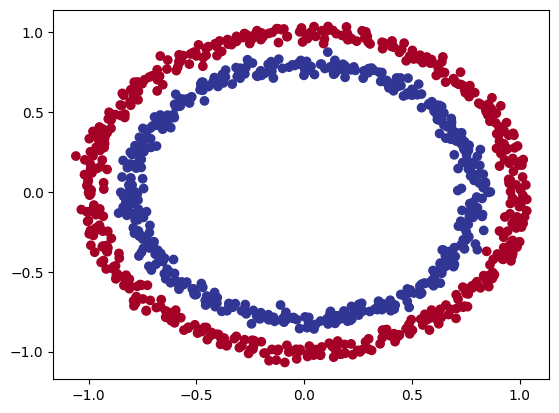

In [170]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 837us/step
doing binary classifcation...


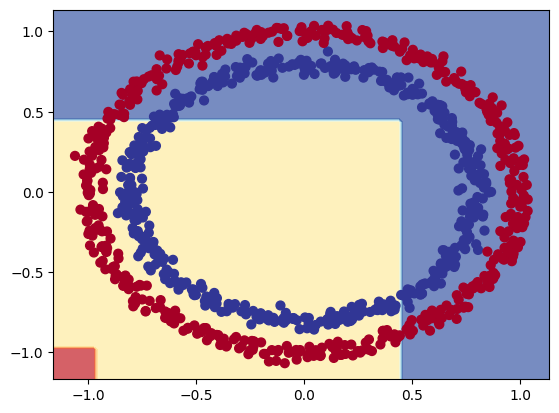

In [171]:
plot_decision_boundary(model_5, X, y)

In [172]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

model_6.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3055 - accuracy: 0.4964
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2517 - accuracy: 0.4984
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2339 - accuracy: 0.4981
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1948 - accuracy: 0.4994
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1497 - accuracy: 0.4989
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1470 - accuracy: 0.4986
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1144 - accuracy: 0.4987
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0712 - accuracy: 0.4988
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9968 - accuracy: 0.4990
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9718 - accuracy: 0.5009
Epoch 11/

In [173]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

model_7.fit(tf.expand_dims(X, axis=-1), y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 1.0351 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 0.8678 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7844 - accuracy: 0.4978
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7455 - accuracy: 0.4987
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7282 - accuracy: 0.4963
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7165 - accuracy: 0.4988
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7101 - accuracy: 0.4978
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7064 - accuracy: 0.4974
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7035 - accuracy: 0.4974
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7012 - accuracy: 0.4989
Epoch 11/

In [174]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5035


[0.6931036710739136, 0.503531277179718]

313/313 [==============================] - 0s 872us/step
doing binary classifcation...


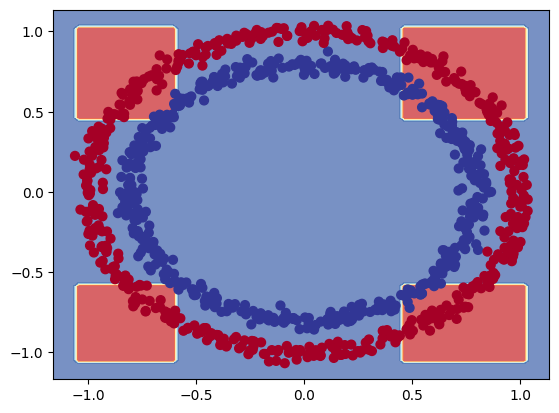

In [175]:
plot_decision_boundary(model_7, X, y)

In [176]:
tf.random.set_seed(42)

# Create a model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X, y, epochs=150, verbose=1)

Epoch 1/150
32/32 [==============================] - 1s 1ms/step - loss: 0.6959 - accuracy: 0.4970
Epoch 2/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.4880
Epoch 3/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4970
Epoch 4/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4900
Epoch 5/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4830
Epoch 6/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4860
Epoch 7/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.4950
Epoch 8/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 9/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.4970
Epoch 10/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.4950
Epoch 11/

In [177]:
model_8.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2116 - accuracy: 0.9710


[0.21160219609737396, 0.9710000157356262]

313/313 [==============================] - 0s 835us/step
doing binary classifcation...


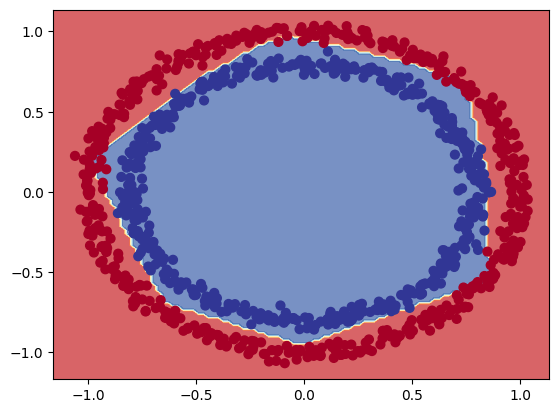

In [178]:
plot_decision_boundary(model_8, X, y)

In [179]:
A = tf.cast(tf.range(-10, 10), tf.float32)

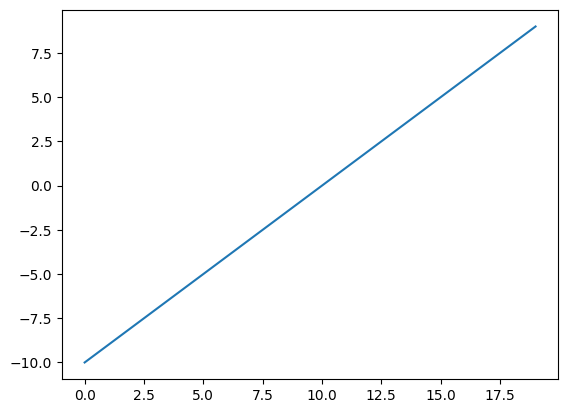

In [180]:
plt.plot(A)

In [181]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>


Sigmoid activation function, makine öğreniminde yapay sinir ağlarının katmanlarında kullanılan bir matematiksel fonksiyondur. S-şeklinde bir eğrisi olan sigmoid fonksiyon, bir nevi giriş değerlerini 0 ile 1 arası bir sınıra "sıkıştırır". Bu sıkıştırma sayesinde sinir ağları özellikle olasılık tahmini yapmak için kullanıldığında sigmoid fonksiyon çok faydalı olur. Çünkü olasılıklar daima 0 ile 1 arasında değerler alır.

**Avantajları**:

* Çıktıyı 0 ve 1 arasına sıkıştırmasıyla özellikle sınıflandırma problemlerinde ve olasılık tahminlerinde kullanışlıdır.
* Hesaplanması kolaydır.

**Dezavantajları**:

* Sigmoid fonksiyonunun grafiğinin yatay asimptotları vardır. Bu, sinir ağlarında gradyanların yok olmasına neden olabilir ve ağın öğrenmesini zorlaştırabilir.
* Sigmoid fonksiyonu bazı durumlarda doygunluğa ulaşabilir. Yani, girişteki büyük değişiklikler çıktıdaki küçük değişikliklere yol açabilir.



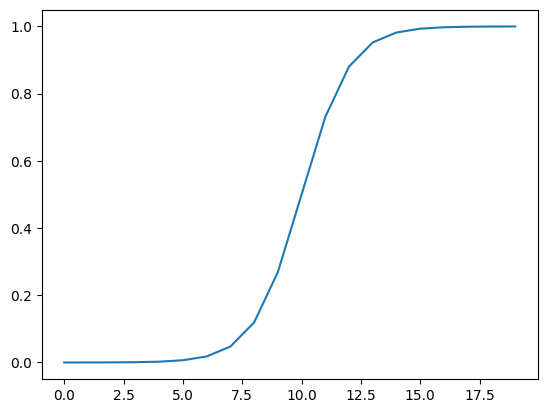

In [182]:
plt.plot(sigmoid(A))

In [183]:
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [184]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

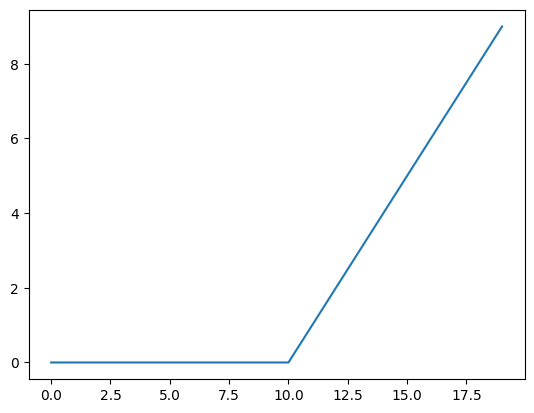

In [185]:
plt.plot(relu(A))

In [186]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

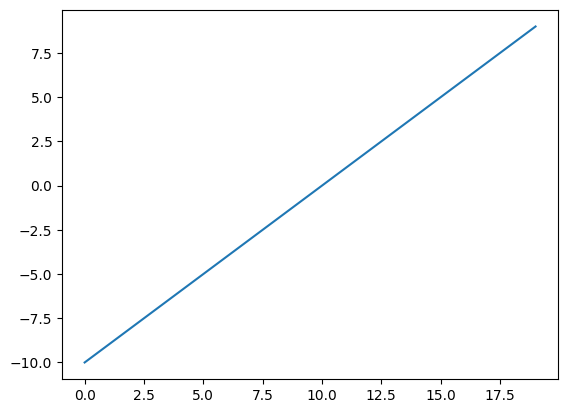

In [187]:
plt.plot(tf.keras.activations.linear(A))

In [188]:
A == tf.keras.activations.linear(A)
# A ve linear A eşit

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Classification Modeli Geliştirme

In [189]:
len(X)

1000

In [190]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]


In [191]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [192]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["Accuracy"])

history = model_9.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 1ms/step - loss: 0.6903 - Accuracy: 0.5013
Epoch 2/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6897 - Accuracy: 0.5000
Epoch 3/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6890 - Accuracy: 0.5100
Epoch 4/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6884 - Accuracy: 0.5075
Epoch 5/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6877 - Accuracy: 0.5138
Epoch 6/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - Accuracy: 0.5125
Epoch 7/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6862 - Accuracy: 0.5188
Epoch 8/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6856 - Accuracy: 0.5213
Epoch 9/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6848 - Accuracy: 0.5263
Epoch 10/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6839 - Accuracy: 0.5250
Epoch 11/50
25/25 [

In [193]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5410 - Accuracy: 0.7600


[0.541024923324585, 0.7599999904632568]

313/313 [==============================] - 0s 845us/step
doing binary classifcation...
313/313 [==============================] - 0s 842us/step
doing binary classifcation...


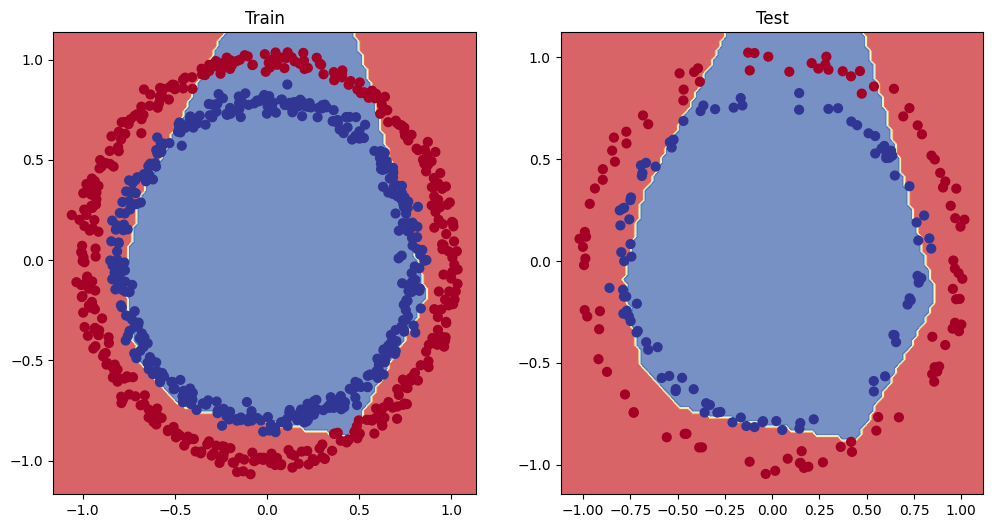

In [194]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_9, X=X_test, y=y_test)
plt.show()

In [195]:
pd.DataFrame(history.history)

,loss,Accuracy
0,0.690339,0.50125
1,0.689710,0.50000
2,0.689015,0.51000
3,0.688364,0.50750
4,0.687748,0.51375
5,0.687097,0.51250
6,0.686183,0.51875
7,0.685610,0.52125
8,0.684766,0.52625
9,0.683940,0.52500


Text(0.5, 1.0, 'model_9')

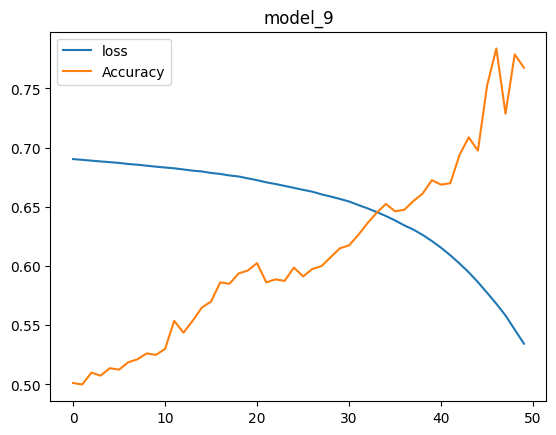

In [196]:
pd.DataFrame(history.history).plot()
plt.title("model_9")

# En iyi Öğrenme yolunu bulma

In [198]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_10 = model_10.fit(X_train, y_train, epochs=100,callbacks=[lr_schedular])

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.6985 - accuracy: 0.4900 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.4900 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.4888 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6978 - accuracy: 0.4875 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.4913 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.4925 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4925 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6966 - accuracy: 0.4925 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

**Amaç**:

* *lr_schedular* satırı TensorFlow'un Keras API'sindeki *tf.keras.callbacks.LearningRateScheduler* sınıfından bir geri dönüş nesnesi oluşturur.
* Bu geri dönüş, model eğitimi sırasında önceden belirlenmiş bir zamanlama fonksiyonuna dayanarak öğrenme oranını dinamik olarak ayarlar.

**Parçalar**:

* *tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))* :
* tf.keras.callbacks.LearningRateScheduler: Bu sınıf öğrenme oranı zamanlamasını yönetmekten sorumludur.
* lambda epoch: 1e-4 * 10**(epoch/20): Bu, öğrenme oranı zamanlamasını tanımlayan anonim bir fonksiyondur (lambda fonksiyonu). Mevcut epoch numarasını (epoch) girdi olarak alır ve o epoch için yeni öğrenme oranını döndürür.

**Öğrenme Oranı Zamanlama Fonksiyonu**:

* 1e-4 * 10**(epoch/20): Bu fonksiyon üssel bir öğrenme oranı zamanlaması uygular. Davranışını parçalara ayıralım:
* 1e-4: Bu, epoch 0'daki başlangıç öğrenme oranıdır (0.0001).
*10**(epoch/20): Bu kısım, her 20 epoch'ta bir öğrenme oranını üssel olarak artıran bir faktör hesaplar.
epoch: Mevcut epoch numarası (0'dan başlar).
* /20: Bu, epoch numarasını 20'ye böler.
* 10**: Bu, sonucu 10'a yükseltir ve üssel bir artışa neden olur.

**Eğitim Üzerindeki Etki**:

* Bu zamanlama, modelin erken aşamada sapmasına neden olabilecek büyük güncellemeleri önlemek için nispeten düşük bir öğrenme oranıyla (0.0001) başlar.
*Eğitim ilerledikçe, öğrenme oranı her 20 epoch'ta bir kademeli olarak artar ve modelin ağırlıklarını ince ayarlamasına ve potansiyel olarak daha hızlı bir çözüme yakınlaşmasına olanak tanır.

**Geri Dönüşün Dahil Edilmesi**:

* callbacks=[lr_schedular]: Bu satır, lr_schedular geri dönüş nesnesini model.fit yöntemine gönderilen callbacks listesine dahil eder.
Eğitim sırasında, LearningRateScheduler geri dönüşü her epoch'ın başında çağrılır. Sağlanan zamanlama fonksiyonunu (lambda epoch: 1e-4 * 10**(epoch/20)) çağırarak o epoch için yeni öğrenme oranını alır ve eğitim için kullanılan optimizatörün (genellikle bu durumda Adam) öğrenme oranını günceller.

<Axes: xlabel='epochs'>

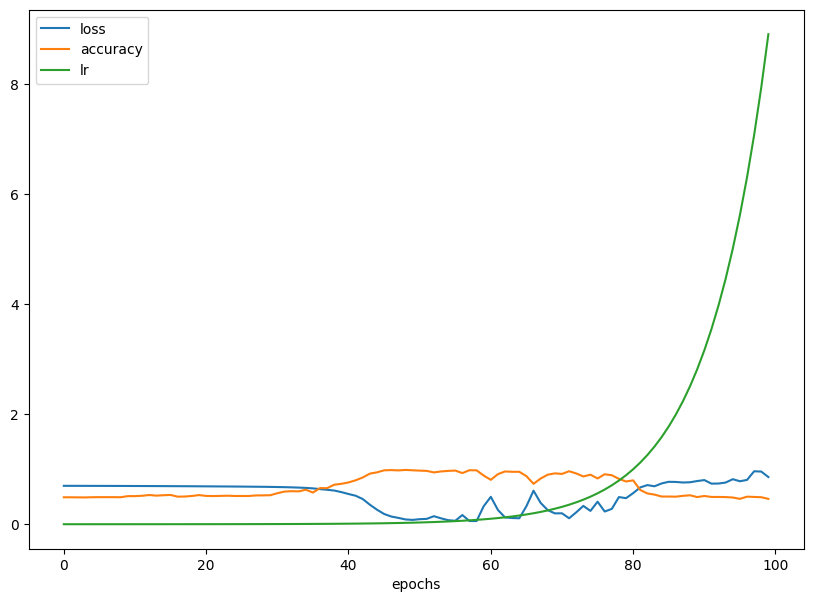

In [199]:
pd.DataFrame(history_10.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0, 0.5, 'loss')

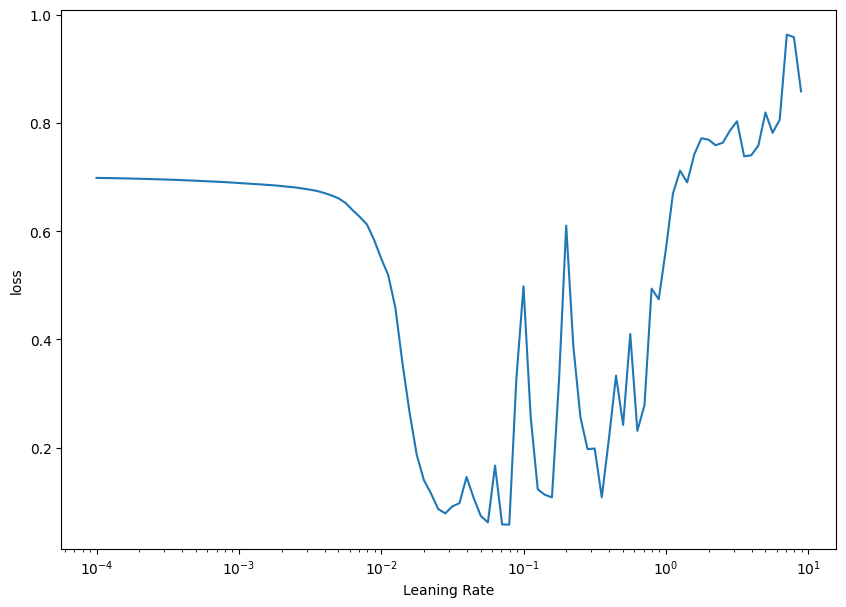

In [204]:
# learning rate ve loss değerini görselleştirme
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_10.history["loss"])
plt.xlabel("Leaning Rate")
plt.ylabel("loss")

In [202]:
len(lrs)

100